# U.S. Bank Failure Analysis 

Data: https://catalog.data.gov/dataset/fdic-failed-bank-list


The inspiration for project comes from my curiosity about recurring financial and economic problems especially after the recent 2008 recession. I will be focusing more on this period of the data from 2000-2017. The data dates back to 1934 and expresses the following values:

**1. Institution name and FIN number

**2. Charter type

**3. Location of headquarters (city and state)

**4. Effective date

**5. Insurance fund and certificate number

**6. Failure transaction type

**7. Total deposits and total assets last reported prior to failure (in thousands of dollars)


There are several challenges to this dataset. 

**First, different periods will have to be excluded from different forms of analysis for instance:

Estimated cost of resolution (Data on estimated losses are not available for FDIC insured failures prior to 1986 or for FSLIC insured failures from 1934-88. The data in this period from 1934-88 can be included in all forms of interpretation except where estimated loss data is needed.
I will consider the failures after 1988 where data exists for estimated losses as significant.

**Second, a large dataset with many values which values to consider, took some time. I focused on Instituion Name (not fin number),Charter Type,Location of headquarters (city and state), and Total deposits and total assets last reported prior to failure (in thousands of dollars)

**Third, I believe that the correlation between other variables can be significant, but for the purposes of this project I am limited to the values within the confines of the dataset. 

**I suspect these variables potentially hold a lot of interesting relationships to the banking industry in the USA. I would be interested in considering Failure transaction type, effective data, and Insurance fund and certificate number at a later date when I gain more of an understanding of what those values mean to me.
***

# Analytic Questions

1. How have institution failures changed over time; which institution is most likely to fail? 

2. How expensive were institution failures in each period relative to other periods?

3. Which states had the highest failures; which single state cost the federal government the most to resolve?

In [1]:
# Importing the necessary libraries to organize the data into a meaningful story through 
#the combination of statistical, visual, and narrative story telling tools.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the banks.csv file stored in my desktop
banks = pd.read_csv('banks.csv')

In [3]:
#I want to note the size of the dataset at the start to show what we are working with
len(banks)

3484

In [4]:
#Calling up the top 5 banks to see how the data and its values are organized in a dataframe
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [5]:
#Extracting out failure year city and state.
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [6]:
#Examining how much missing data is present to futher clean the data
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
Failure Year                      0
City                              0
State                             0
dtype: int64

In [7]:
#Summary Statistics, these summarize and provide information about the following values in my dataset
banks[['Total Deposits', 'Total Assets', 'Estimated Loss (2015)', 'Failure Year']].describe()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year
count,3.484000e+03,3.333000e+03,2.509000e+03,3484.000000
mean,2.997762e+05,4.045884e+05,7.064435e+04,1985.213261
std,3.304676e+06,5.454873e+06,3.305872e+05,19.654791
min,0.000000e+00,1.400000e+01,-4.386000e+03,1934.000000
25%,1.229300e+04,1.505100e+04,3.852000e+03,1985.000000
50%,4.172100e+04,4.752300e+04,1.335400e+04,1989.000000
75%,1.562415e+05,1.734780e+05,4.458500e+04,1991.000000
max,1.882608e+08,3.070216e+08,1.243800e+07,2017.000000


# Analytic Question 1
##**How have bank failures changed over time; which institution is more likely to fail? Commercial Bank, Savings Association, or Savings Bank?

To more clearly understand how bank failures changed over time I grouped the data by institution type. I figured that the type of institution is significant because the banks aggregated in this dataset aren't just banks, they are distinctly different institutions that serve different uses.  

In [29]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].agg(['mean', 'count'])

,mean,count
Institution Type,,
COMMERCIAL BANK,41835.451513,1619
SAVINGS ASSOCIATION,106485.405594,572
SAVINGS BANK,152847.254717,318


Commercial banks account for most of the failures, but only represent a relative small portion of the total loss.

Now let's look at time and see how bank failures have changed over the major periods in history . . .

Text(0,0.5,u'Bank Failures')

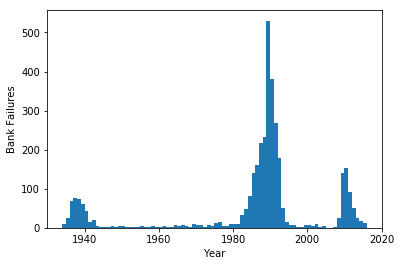

In [10]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

State conclusions . . . we can see the three major economic collapses reflected in this plot

Now . . . lets see if the institution type that fails varies over time . . .

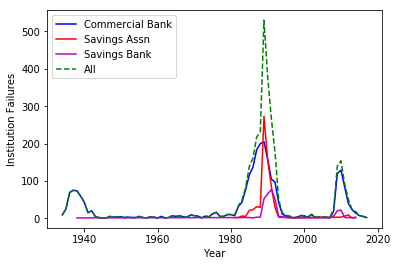

In [11]:
failure_year_type = banks.groupby(['Failure Year', 'Institution Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Institution Type', 'Number of Failures']

failure_year_comm = failure_year_type[failure_year_type['Institution Type']=='COMMERCIAL BANK']
failure_year_savea = failure_year_type[failure_year_type['Institution Type']=='SAVINGS ASSOCIATION']
failure_year_saveb = failure_year_type[failure_year_type['Institution Type']=='SAVINGS BANK']


failure_year_all = failure_year_type[(failure_year_type['Institution Type']=='COMMERCIAL BANK') | (failure_year_type['Institution Type']=='SAVINGS ASSOCIATION') | (failure_year_type['Institution Type']=='SAVINGS BANK')]
failure_year_all = failure_year_all.groupby('Failure Year', as_index=False)['Number of Failures'].agg('sum')

plt.plot(failure_year_comm['Failure Year'], failure_year_comm['Number of Failures'], 'b-')
plt.plot(failure_year_savea['Failure Year'], failure_year_savea['Number of Failures'], 'r-')
plt.plot(failure_year_saveb['Failure Year'], failure_year_saveb['Number of Failures'], 'm-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g--')



plt.xlabel('Year')
plt.ylabel('Institution Failures')
plt.legend(['Commercial Bank', 'Savings Assn', 'Savings Bank', 'All'])

Commercial banks are big failure type in the Great Depression and Mortgage collapse.  During the 80s it's more spread out . . 

What I am doing 
Why Iam doing it
What conclusions I can draw from it

Paragraph for each

### Put your Mann Whitney stuff here (move it from question 2)

Want to show statistically that the Estimated Loss for the various types of banks are different.  T-test doesn't apply since data not normal (maybe show a QQ plot????).  So, we use Mann Whitney on Estimated Loss (2015)

In [44]:
from scipy.stats import mannwhitneyu 

savings_assn = banks[banks['Institution Type']=='SAVINGS ASSOCIATION']
savings = banks[banks['Institution Type']=='SAVINGS BANK']
commerical = banks[banks['Institution Type']=='COMMERCIAL BANK']

u, p = mannwhitneyu(savings_assn['Estimated Loss (2015)'], savings['Estimated Loss (2015)'])
print((u, p))

#repeat this for the other two pairs . .  commerical and savings, and commerical and savings assn


(100227.5, 0.0014239659629209772)


## Analytic Question 2 
### ** Which bank cost the government most to resolve in each period, relative to others across all periods?**

This question is interesting because we already know which general periods of time that the majority of financial institutions failed, but we don't know the loss of the biggest failure in each period. And how does that institution compare to the second, third, fourth biggest failures? What is this like for all three periods? Do any interesting patterns emerge? 

It is interesting to note the difference between loss and cost. Loss is something we have in the data set but cost is something we don't. The cost to the government would probably have to be keep a frame of reference for this question placed on the cost to the government and the biggest loss relative  cost the

I've decided to import an inflation multiplier to adjust total assets for inflation and use this new metric as a proxy to compare and contrast losses across all periods. I've done this becausethere isn't enough data on estimated losses (2015) beyond 1988.

Using this new metric to measure losses; we divide the data into the three periods or "ranges" of time. These specific ranges will be as follows: 
year_range_1(1934, 1943)
year_range_2(1980, 1990)
year_range_3(2000, 2015)

These ranges are in keeping with the time frames we sorted earlier in answering question one where a histogram can show you those ranges more clearly.

Below is where we read the file and define the new banks_inflation data frame and see the values that the data is organized under. 

In [32]:
conversion_df = pd.read_csv('inflation.csv')
banks_inflation = pd.merge(banks, conversion_df, left_on='Failure Year', right_on='year')
banks_inflation.columns

Index([u'Financial Institution Number', u'Institution Name',
       u'Institution Type', u'Charter Type', u'Headquarters', u'Failure Date',
       u'Insurance Fund', u'Certificate Number', u'Transaction Type',
       u'Total Deposits', u'Total Assets', u'Estimated Loss (2015)',
       u'Failure Year', u'City', u'State', u'year', u'inflation_multiplier'],
      dtype='object')

Below we do two things:

1. We create a table that converts 2015 vals to 2017 vals; 2017 values are what I chose so as to be as current as possible to a ubiquitious inflation rate.

2. We then sort the values by Institution Name and Total Assets (2015) and we plot those values to compare their bar plots to determine if there is a correlation. 


In the following cell's block of code I attempted to test two data samples; 'Total Assets (2015)', and 'Estimated Loss (2015)'.
I first attempted a peasrson test for normal distribution, but it didn't work because the data are not normally distibuted.
So instead I went with the Mann Whitney U test; a nonparametric test of the null hypothesis
Unlike the t-test it does not require the assumption of normal distributions. It is nearly as efficient as the t-test is on normal distributions.

## Put Pearson back here

(1402117.0, 6.475764628495759e-254)


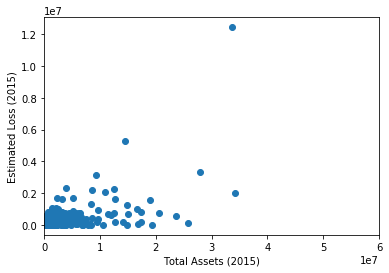

In [33]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier'] 
plt.scatter(banks_inflation['Total Assets (2015)'], banks_inflation['Estimated Loss (2015)']) 
plt.xlabel('Total Assets (2015)') 
plt.ylabel('Estimated Loss (2015)') 
plt.xlim([0, 0.6e8])

bankst = banks_inflation.dropna(subset=['Total Assets (2015)', 'Estimated Loss (2015)', 'Total Assets']) 
u, p = mannwhitneyu(bankst['Total Assets'], bankst['Estimated Loss (2015)']) 
print(u, p)

Below I've created summary statistics for each variable we tested for, Estimated Loss (2015), and Total Assets. This is to show how they are differently distributed before we brought the two sets of data together to compare.

In [34]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].describe()

,count,mean,std,min,25%,50%,75%,max
Institution Type,,,,,,,,
COMMERCIAL BANK,1619.0,41835.451513,139013.822067,0.0,3180.00,8857.0,30081.0,3330263.0
SAVINGS ASSOCIATION,572.0,106485.405594,282282.109304,-551.0,7208.00,24116.0,73533.5,3142552.0
SAVINGS BANK,318.0,152847.254717,780479.657822,-4386.0,7977.25,25392.5,93980.5,12438005.0


In [35]:
banks.groupby(['Institution Type'])['Total Assets'].describe()

,count,mean,std,min,25%,50%,75%,max
Institution Type,,,,,,,,
COMMERCIAL BANK,2315.0,1.795535e+05,8.938253e+05,14.0,9706.0,27090.0,98846.0,25455112.0
SAVINGS ASSOCIATION,691.0,4.505859e+05,1.084308e+06,4816.0,54397.5,127005.0,319666.0,13382327.0
SAVINGS BANK,327.0,1.900526e+06,1.712776e+07,4008.0,64505.0,174717.0,643582.5,307021614.0


Above we see that most of the data cluster around 
Below we sort the values in our new dataframe by Institution Name and Total Assets (2015). 
Then we plot those values and compare the bar plots of each 

I wanted to create these graphs showing the top five largest banks in each period(range) of time compared to a sample of the larger population. 

(<matplotlib.axes._subplots.AxesSubplot at 0x113fb8310>,)

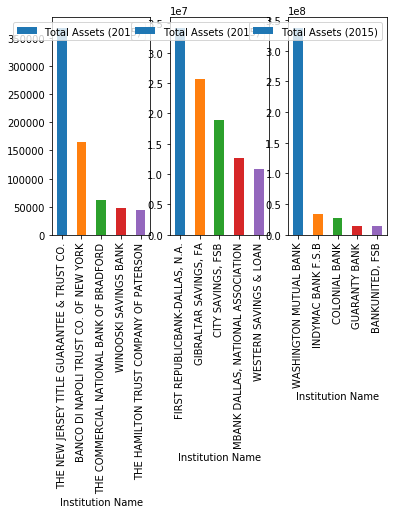

In [36]:
#Highlight the work that's been needed to create these graphs
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[0]), 
banks_2.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[1]), 
banks_3.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[2]), 

The biggest asset bank is quite removed from the other banks. In the first period the largest bank is removed from the others by a factor of 2. In the second not by much, maybe by 500,000. In the third by a factor of 7.

Next > You could probably try to compute some summary stat about how big the largest bank was relative to second or how many banks underneath the first it takes for the total assets to be comparable.

You will need to build in a bit of narrative around it and you will want to have some **summary statistics** explaining what is going on with this question and why it is interesting. 

Text(0.5,0,u'')

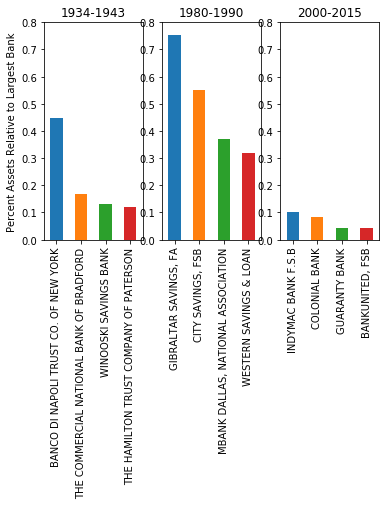

In [37]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5] 
banks_1['total_assets_normalized']=banks_1['Total Assets (2015)']/banks_1['Total Assets (2015)'].iloc[0]
banks_1 = banks_1.iloc[1:5]

banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_2['total_assets_normalized']=banks_2['Total Assets (2015)']/banks_2['Total Assets (2015)'].iloc[0]
banks_2 = banks_2.iloc[1:5]


banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5) 
#banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_3['total_assets_normalized']=banks_3['Total Assets (2015)']/banks_3['Total Assets (2015)'].iloc[0]
banks_3 = banks_3.iloc[1:5]

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[0],legend=False, ylim=(0,.8),title='1934-1943')

banks_2.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[1],legend=False, ylim=(0,.8),title='1980-1990')


banks_3.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[2],legend=False, ylim=(0,.8),title='2000-2015')

axes[0].set_xlabel("")
axes[0].set_ylabel("Percent Assets Relative to Largest Bank")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

There seems to be an inverse relationship between the type of institution and the average losses. The least number of savings banks cost the government the most money to resolve. 

In [38]:
banks_inflation.groupby(['Institution Type'])['Total Assets (2015)'].agg(['mean','std','count'])

,mean,std,count
Institution Type,,,
COMMERCIAL BANK,2.673818e+05,1.356841e+06,2315
SAVINGS ASSOCIATION,8.367140e+05,2.014593e+06,691
SAVINGS BANK,2.482396e+06,1.890531e+07,327


## Analytic Question 3
### **How have bank failures varied by states over time**

In this question we are building on the second question a bit to understand the cost of a state over time to resolve rather than one particular istitution. And maybe it would be cool ot see how those weakest states fared over each of the most trying times of our financial system; much like we did when comparing the banks across periods.

This question is interesting because it can give us a geographic location that we can tangibly understand. It is the final piece of the puzzle to understanding bank failures in the United States. 

## Break up failures into the three major time periods.  Compute counts and losses for each state per period and plot results 

# Get a bar plot of how many failures came from each state and have a subplot for each period.

# Repeat this for the Total Assets (2015)

# Tell story with this (6 graphs total)

In [45]:
len(banks)

3484

Of the 3,484 financial institutions in this dataset, which states had the highest failures? We'll delve into this question with the `State` variable in mind. Below we are plotting the histogram of the Bank Failures by State and printing the States with the top 5 banks failures. I decided to go with a histogram; ordered alphabetically and numerically. It shows the states on the  axis clearly, and the number of failures clearly as well in incraments of 100.

Text(0,0.5,u'Bank Failures')

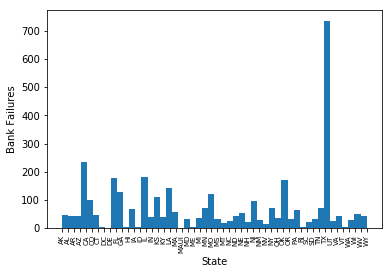

In [46]:
#Get banks_1, banks_2, banks_3 . . . repeat this plot for each time period

plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

#banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count').sort_values(by='Institution Name',ascending=False)
#banks_by_state.plot.bar(x='State',y='Institution Name')
#banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

We find from the tables above that, Texas is by far the state with the largest amount of bank failures of any type and across all periods of time in the USA in aggregate. 

Next we look for the value across all time periods. 

Finally we discover what the losses were for all states. Then we take the average losses of each state and show this data from highest average losses to lowest average losses. 

Next we find what the bank failures were in the top failing states for each period. 

In [47]:
banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('sum').sort_values(by='Estimated Loss (2015)',ascending=False)

,State,Estimated Loss (2015)
44,TX,38684926.0
4,CA,26625092.0
9,FL,16861759.0
10,GA,11806236.0
35,NY,5985362.0
14,IL,5937997.0
3,AZ,5734352.0
18,LA,5606330.0
1,AL,4606439.0
19,MA,4342477.0


The state that cost the government the most to resolve was once again Texas at 38,684,926,000.0
Below we show the top five banks with estimated losses and their output in the form of a summary table of the top institutions and its corresponding histogram.

,State,Estimated Loss (2015)
44,TX,647
4,CA,191
9,FL,158
14,IL,125
18,LA,121


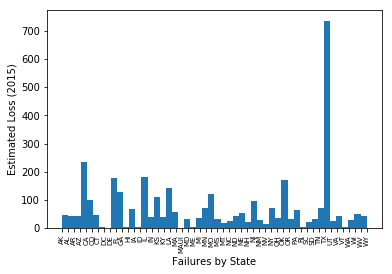

In [48]:
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

banks_by_state = banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('count')
banks_by_state.sort_values(by='Estimated Loss (2015)', ascending=False).iloc[0:5]

Text(0,0.5,u'Estimated Loss (2015)')

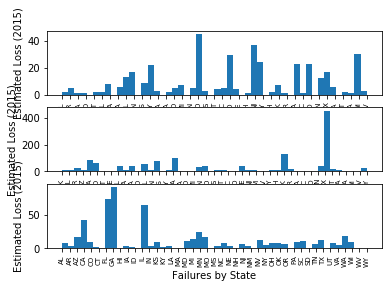

In [54]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)

banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)]
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)]
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)]


plt.subplot(3,1,1)
plt.hist(banks_1['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

plt.subplot(3,1,2)
plt.hist(banks_2['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

plt.subplot(3,1,3)
plt.hist(banks_3['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')


#banks_1.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[0],legend=False, ylim=(0,.8),title='1934-1943')

#banks_2.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[1],legend=False, ylim=(0,.8),title='1980-1990')

#banks_3.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[2],legend=False, ylim=(0,.8),title='2000-2015')

#axes[0].set_xlabel("")
#axes[0].set_ylabel("Percent Assets Relative to Largest Bank")
#axes[1].set_xlabel("")
#axes[2].set_xlabel("")

Texas lost 6 times as much as the next most failing state, California. And the rest of the banks were relatively the same. 

Since we have already seen the three big periods to failures, it might be cool to see how bad the worst failures of each period were in 2015 USD. The biggest number of failures were 80s, but it looks like 2000s cost the most?

I am noticing a lot of edits other than the explanatory text for Question 2 (which is actually pretty good).  You need to do a lot of work on the explanation for the intro and Question 1 (you are still relying on inline comments with your code instead of markdown).  You also need to do some major work on question 3.  Right now it looks like two quick summary plots without any interesting conclusions or statistical work.

I won't be able to meet with you until next Monday so you have plenty of time to work on this.  At a minimum I think you are going to need to put in about 25 hours on this to get it ready for submission.  Do ping me if you have any question.

I would suggest you keep working on this and also get your third question finished.  This will involve you separating out failures by state for the three major time periods.
